In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error
import pydotplus
import seaborn as sns
sns.set()

# Data preprocessing

In [2]:
#loading white wine dataset
df_white = pd.read_csv('winequality-white.csv', sep = ';')
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
#creating the new column if wine is red or white
df_white['is_red'] = [0 for i in range(len(df_white))]
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [4]:
#loading red wine dataset
df_red = pd.read_csv('winequality-red.csv', sep = ';')
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
#creating the new column if wine is red or white
df_red['is_red'] = [1 for i in range(len(df_red))]
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [6]:
#Joining both datasets
df = pd.concat([df_white, df_red])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [7]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [9]:
#we will ignore the values with 3,4,8,9 as they have less samples
df = df[(df['quality']>4) & (df['quality']<8)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [10]:
X = df.drop(['quality', 'is_red'], axis = 1).values 
Y = df.iloc[:, 11:]
X.shape

(6053, 11)

In [11]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, stratify = Y, test_size = 0.2, random_state= 30)
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((4842, 11), (1211, 11), (4842, 2), (1211, 2))

In [12]:
#the output should have two different arrays for two labels
def formatY(Y):
    Y1 = []
    Y2 = []
    for i in range(len(Y)):
        Y1.append(Y.iloc[i, 0])
        Y2.append(Y.iloc[i, 1])
    return (np.array(Y1), np.array(Y2))

In [13]:
Ytrain_for = formatY(Ytrain)
Ytrain_for

(array([5, 5, 6, ..., 7, 6, 6], dtype=int64),
 array([1, 1, 0, ..., 0, 0, 0], dtype=int64))

In [14]:
Ytest_for = formatY(Ytest)
Ytest_for

(array([5, 6, 5, ..., 6, 6, 6], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [15]:
sc = StandardScaler()
Xtrain_sc = sc.fit_transform(Xtrain)
Xtest_sc = sc.transform(Xtest)

# Building the Model

 Since we want two outputs - Wine Quality & Wine Type, we will use functional API  

In [16]:
#Define the input layer
inputs = Input(shape = (11,))

#Define the dense layers
x1 = Dense(units = 128, activation = 'relu', name = 'dense_1')(inputs)
x2 = Dense(units = 128, activation = 'relu', name = 'dense_2')(x1)

#define the first output
wine_quality = Dense(units = 1, name = 'wine_quality')(x2)

#define the second output
wine_type = Dense(units = 1, activation = 'sigmoid', name = 'wine_type')(x2)

model = Model(inputs = inputs, outputs = [wine_quality, wine_type])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 11)]         0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 128)          1536        ['input_1[0][0]']                
                                                                                                  
 dense_2 (Dense)                (None, 128)          16512       ['dense_1[0][0]']                
                                                                                                  
 wine_quality (Dense)           (None, 1)            129         ['dense_2[0][0]']                
                                                                                              

In [17]:
# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

#wine type is classification, wine quality is regression so define parameters accordingly
model.compile(optimizer=optimizer,
              loss={'wine_type': 'binary_crossentropy', 'wine_quality': tf.keras.losses.MeanSquaredError()},
              metrics={'wine_type': 'accuracy',
                       'wine_quality': tf.keras.metrics.RootMeanSquaredError()})

In [18]:
hist = model.fit(Xtrain_sc, Ytrain_for, epochs = 40)

Epoch 1/40
152/152 [==============================] - 6s 4ms/step - loss: 18.7615 - wine_quality_loss: 18.1767 - wine_type_loss: 0.5848 - wine_quality_root_mean_squared_error: 4.2634 - wine_type_accuracy: 0.7458
Epoch 2/40
152/152 [==============================] - 1s 4ms/step - loss: 4.2176 - wine_quality_loss: 3.7475 - wine_type_loss: 0.4701 - wine_quality_root_mean_squared_error: 1.9358 - wine_type_accuracy: 0.7495
Epoch 3/40
152/152 [==============================] - 1s 4ms/step - loss: 2.4366 - wine_quality_loss: 2.1070 - wine_type_loss: 0.3296 - wine_quality_root_mean_squared_error: 1.4516 - wine_type_accuracy: 0.8720
Epoch 4/40
152/152 [==============================] - 1s 4ms/step - loss: 1.9216 - wine_quality_loss: 1.7006 - wine_type_loss: 0.2210 - wine_quality_root_mean_squared_error: 1.3041 - wine_type_accuracy: 0.9804
Epoch 5/40
152/152 [==============================] - 1s 4ms/step - loss: 1.6171 - wine_quality_loss: 1.4654 - wine_type_loss: 0.1517 - wine_quality_root_mean

152/152 [==============================] - 0s 3ms/step - loss: 0.3300 - wine_quality_loss: 0.3042 - wine_type_loss: 0.0258 - wine_quality_root_mean_squared_error: 0.5516 - wine_type_accuracy: 0.9957
Epoch 40/40
152/152 [==============================] - 0s 3ms/step - loss: 0.3271 - wine_quality_loss: 0.3015 - wine_type_loss: 0.0256 - wine_quality_root_mean_squared_error: 0.5491 - wine_type_accuracy: 0.9957


In [19]:
Ytest_pred = model.predict(Xtest_sc)

38/38 [==============================] - 0s 3ms/step


In [20]:
Ytest_pred = np.round(Ytest_pred)
Ytest_pred = Ytest_pred.astype(int)
Ytest_pred

array([[[5],
        [6],
        [5],
        ...,
        [6],
        [6],
        [6]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]])

In [21]:
Ytest_pred[0].ravel()

array([5, 6, 5, ..., 6, 6, 6])

In [22]:
Ytest_for

(array([5, 6, 5, ..., 6, 6, 6], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [23]:
Ytest_for[0]

array([5, 6, 5, ..., 6, 6, 6], dtype=int64)

In [24]:
mean_squared_error(Ytest_for[0], Ytest_pred[0].ravel())

0.41453344343517756

In [25]:
#MAE for wine quality (regression)
mean_absolute_error(Ytest_for[0], Ytest_pred[0].ravel())

0.39801816680429397

In [26]:
#Accuracy for Wine type (classification)
accuracy_score(Ytest_for[1],  Ytest_pred[1].ravel())

0.9950454170107349

In [27]:
print(classification_report(Ytest_for[1], Ytest_pred[1].ravel()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       907
           1       0.99      0.99      0.99       304

    accuracy                           1.00      1211
   macro avg       0.99      0.99      0.99      1211
weighted avg       1.00      1.00      1.00      1211



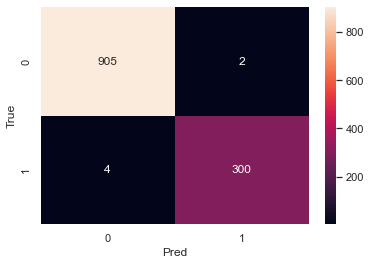

In [28]:
cm = confusion_matrix(Ytest_for[1],  Ytest_pred[1].ravel())
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Pred')
plt.ylabel('True')
plt.show()